<a href="https://colab.research.google.com/github/aish793/Sandbox/blob/master/Deep%20Learning/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Load Dataset

In [0]:
from google.colab import files
files.upload()

Import Dataset

11493376/11490434 [==============================] - 0s 0us/step


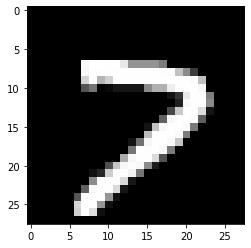

In [3]:
from datasets import MNISTDataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # train_images = (60000,28,28) train_labels = (60000,), test_images.shape = (10000,28,28)

plt.imshow(train_images[467], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)    # data = datasets.MNISTDataset

Multi Layer Perceptron(MLP)

In [0]:
#Hyperparameters
train_steps = 1000
learning_rate = 0.1
input_neurons = 784
layer1_neurons = 512
output_neurons = 10 

In [0]:
# layer1
W1 = tf.Variable(tf.random.uniform([input_neurons,layer1_neurons], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b1 = tf.Variable(np.zeros(layer1_neurons, dtype=np.float32))

#output layer
W2 = tf.Variable(tf.random.uniform([layer1_neurons,output_neurons], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b2 = tf.Variable(np.zeros(output_neurons, dtype=np.float32))

In [18]:
def cal_logits(x):
  h1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1) # layer1
  o1= tf.matmul(h1, W2) + b2 # output layer
  return o1

for step in range(train_steps):
  img_batch, lbl_batch = data.next_batch() #img_batch = (128,784), lbl_batch = (128,)
  with tf.GradientTape(persistent=True) as tape:#computes the gradient w.r.t input variables
     logits = cal_logits(img_batch)
     xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
  grads = tape.gradient(xent, [W1, b1, W2, b2])

  W1.assign_sub(learning_rate * grads[0])
  b1.assign_sub(learning_rate * grads[1])

  W2.assign_sub(learning_rate * grads[2])
  b2.assign_sub(learning_rate * grads[3])

  if not step % 100:
      preds = tf.argmax(logits, axis=1, output_type=tf.int32)
      acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
      print("Loss: {} Accuracy: {}".format(xent, acc))


Loss: 2.5309672355651855 Accuracy: 0.0703125
Loss: 1.1334214210510254 Accuracy: 0.7578125
Loss: 0.7879695892333984 Accuracy: 0.796875
Starting new epoch...
Loss: 0.621806263923645 Accuracy: 0.84375
Loss: 0.4959004521369934 Accuracy: 0.8671875
Loss: 0.4744044542312622 Accuracy: 0.8671875
Loss: 0.35258522629737854 Accuracy: 0.8984375
Loss: 0.3617587983608246 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.31398069858551025 Accuracy: 0.921875
Loss: 0.458537220954895 Accuracy: 0.8515625


Testing the network

In [19]:
test_pred_h1 = tf.nn.relu(tf.matmul(data.test_data, W1) + b1)  
test_preds = tf.argmax(tf.matmul(test_pred_h1, W2) + b2, axis=1,
                       output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float64))

print("Accuracy: {}".format(test_acc))

Accuracy: 0.8449


Observations:

Hidden layers - 1 | No of neurons in hidden layers - 512 | Activation Function - RelU, Softmax | Acc(Tr,Test) = 93.75,94.27

Hidden layers - 1 | No of neurons in hidden layers - 112 | Activation Function - RelU, Softmax | Acc(Tr,Test) = 95.31,93.15


Hidden layers - 1 | No of neurons in hidden layers - 16 | Activation Function - RelU, Softmax | Acc(Tr,Test) = 94.53,91.71


Hidden layers - 1 | No of neurons in hidden layers - 512 | Activation Function - Tanh, Softmax | Acc(Tr,Test) = 93.75 , 85.56

Hidden layers - 1 | No of neurons in hidden layers - 512 | Activation Function - Sigmoid, Softmax | Acc(Tr,Test) = 85.15, 84.49